<a href="https://colab.research.google.com/github/jonas-richter/tara_guidi2016_data/blob/data_exploration/Prokaryote_abundance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prokaryotes count per sample

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.express as px
sns.set()
## ML
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# read data
prok_norm = pd.read_csv('https://github.com/jonas-richter/tara_guidi2016_data/blob/data_exploration/data/prok.norm.ab.tsv?raw=true', 
                  on_bad_lines='skip', sep='\t', header = 0)

In [4]:
# view data
prok_norm.loc[range(len(prok_norm))]

,Sample,Bacteria;Actinobacteria;Acidimicrobiia;Acidimicrobiales;Acidimicrobiaceae;Ferrithrix,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;M2PB4-61 termite group,Bacteria;Actinobacteria;Actinobacteria;Frankiales;Cryptosporangiaceae;Fodinicola,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Hyphomicrobiaceae;Cucumibacter,Bacteria;Actinobacteria;Thermoleophilia;Gaiellales;Gaiellaceae;Gaiella,Bacteria;Actinobacteria;Actinobacteria;Micromonosporales;Micromonosporaceae;Catelliglobosispora,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Antarctobacter,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetivibrio,Bacteria;Proteobacteria;Deltaproteobacteria;Desulfobacterales;Desulfobulbaceae;Desulfobulbus,...,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Dorea,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Phyllobacteriaceae;Aminobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Chromatiales;Ectothiorhodospiraceae;Arhodomonas,Bacteria;Proteobacteria;Class Incertae Sedis;Order Incertae Sedis;Family Incertae Sedis;Candidatus Allobeggiatoa,Bacteria;Bacteroidetes;Cytophagia;Cytophagales;Cytophagaceae;Larkinella,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Rhodobiaceae;Parvibaculum,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;RC9 gut group,Bacteria;Cyanobacteria;Cyanobacteria;SubsectionV;FamilyI;Stigonema,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Phyllobacteriaceae;Mesorhizobium,Bacteria;Proteobacteria;Deltaproteobacteria;Desulfobacterales;Desulfobulbaceae;Desulfopila
0,S4DCM,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,0.0,0.000007,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000007,0.00000,0.000000,0.000070,0.000000
1,S4SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000033,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000077,0.000000
2,S7DCM,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000013,0.00000,0.000000,0.000052,0.000000
3,S7SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.000013,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000013,0.000000
4,S9DCM,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000031,...,0.000000,0.000021,0.000000,0.000010,0.0,0.000010,0.00000,0.000000,0.000021,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,S150SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000008,0.000000,0.0,0.000040,0.00000,0.000000,0.000049,0.000000
100,S151DCM,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000019,0.000000,0.000000,0.000029,0.0,0.000010,0.00001,0.000000,0.000000,0.000010
101,S151SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000008,...,0.000016,0.000000,0.000000,0.000000,0.0,0.000024,0.00000,0.000008,0.000016,0.000000
102,S152DCM,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000062,0.000009


In [5]:
# info
prok_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Columns: 1329 entries, Sample to Bacteria;Proteobacteria;Deltaproteobacteria;Desulfobacterales;Desulfobulbaceae;Desulfopila
dtypes: float64(1328), object(1)
memory usage: 1.1+ MB


In [7]:
# make Eukaryotic lineages as row name
prok_norm_2 = prok_norm.set_index('Sample')

prok_norm_2.head()
# plot
#px.imshow(euk_norm_2, aspect = 0.2)

,Bacteria;Actinobacteria;Acidimicrobiia;Acidimicrobiales;Acidimicrobiaceae;Ferrithrix,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;M2PB4-61 termite group,Bacteria;Actinobacteria;Actinobacteria;Frankiales;Cryptosporangiaceae;Fodinicola,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Hyphomicrobiaceae;Cucumibacter,Bacteria;Actinobacteria;Thermoleophilia;Gaiellales;Gaiellaceae;Gaiella,Bacteria;Actinobacteria;Actinobacteria;Micromonosporales;Micromonosporaceae;Catelliglobosispora,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Antarctobacter,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetivibrio,Bacteria;Proteobacteria;Deltaproteobacteria;Desulfobacterales;Desulfobulbaceae;Desulfobulbus,Bacteria;Proteobacteria;Deltaproteobacteria;Desulfobacterales;Desulfobacteraceae;Desulfonema,...,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Dorea,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Phyllobacteriaceae;Aminobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Chromatiales;Ectothiorhodospiraceae;Arhodomonas,Bacteria;Proteobacteria;Class Incertae Sedis;Order Incertae Sedis;Family Incertae Sedis;Candidatus Allobeggiatoa,Bacteria;Bacteroidetes;Cytophagia;Cytophagales;Cytophagaceae;Larkinella,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Rhodobiaceae;Parvibaculum,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;RC9 gut group,Bacteria;Cyanobacteria;Cyanobacteria;SubsectionV;FamilyI;Stigonema,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Phyllobacteriaceae;Mesorhizobium,Bacteria;Proteobacteria;Deltaproteobacteria;Desulfobacterales;Desulfobulbaceae;Desulfopila
Sample,,,,,,,,,,,,,,,,,,,,,
S4DCM,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,0.0,0.000007,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.000007,0.0,0.0,0.000070,0.00000
S4SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000033,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000077,0.00000
S7DCM,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.000013,0.0,0.0,0.000052,0.00000
S7SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.000013,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000013,0.00000
S9DCM,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000031,0.0,...,0.0,0.000021,0.0,0.00001,0.0,0.000010,0.0,0.0,0.000021,0.00001


In [8]:
# center and scale data (account for some species being overall higher or lower abundant)
sc = StandardScaler()
# apply scaler
prok_scaled = sc.fit_transform(prok_norm_2.to_numpy())
# convert to pandas data frame
prok_scaled = pd.DataFrame(prok_scaled, columns=[prok_norm_2.columns])
# make Eukaryotic lineages as row name
prok_scaled = prok_scaled.set_index(prok_norm['Sample'])
# show first n rows
prok_scaled.head()

,Bacteria;Actinobacteria;Acidimicrobiia;Acidimicrobiales;Acidimicrobiaceae;Ferrithrix,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;M2PB4-61 termite group,Bacteria;Actinobacteria;Actinobacteria;Frankiales;Cryptosporangiaceae;Fodinicola,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Hyphomicrobiaceae;Cucumibacter,Bacteria;Actinobacteria;Thermoleophilia;Gaiellales;Gaiellaceae;Gaiella,Bacteria;Actinobacteria;Actinobacteria;Micromonosporales;Micromonosporaceae;Catelliglobosispora,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Antarctobacter,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetivibrio,Bacteria;Proteobacteria;Deltaproteobacteria;Desulfobacterales;Desulfobulbaceae;Desulfobulbus,Bacteria;Proteobacteria;Deltaproteobacteria;Desulfobacterales;Desulfobacteraceae;Desulfonema,...,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Dorea,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Phyllobacteriaceae;Aminobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Chromatiales;Ectothiorhodospiraceae;Arhodomonas,Bacteria;Proteobacteria;Class Incertae Sedis;Order Incertae Sedis;Family Incertae Sedis;Candidatus Allobeggiatoa,Bacteria;Bacteroidetes;Cytophagia;Cytophagales;Cytophagaceae;Larkinella,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Rhodobiaceae;Parvibaculum,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;RC9 gut group,Bacteria;Cyanobacteria;Cyanobacteria;SubsectionV;FamilyI;Stigonema,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Phyllobacteriaceae;Mesorhizobium,Bacteria;Proteobacteria;Deltaproteobacteria;Desulfobacterales;Desulfobulbaceae;Desulfopila
Sample,,,,,,,,,,,,,,,,,,,,,
S4DCM,-0.098533,-0.098533,-0.098533,-0.133106,-0.098533,-0.140028,1.060385,-0.1361,0.018775,-0.240744,...,-0.376741,-0.445061,-0.217119,-0.440011,-0.098533,-0.305741,-0.443526,-0.197265,1.510690,-0.332652
S4SUR,-0.098533,-0.098533,-0.098533,-0.133106,-0.098533,-0.140028,-0.403299,-0.1361,-0.532627,-0.240744,...,-0.376741,4.354378,-0.217119,-0.440011,-0.098533,-0.339899,-0.443526,-0.197265,1.758993,-0.332652
S7DCM,-0.098533,-0.098533,-0.098533,-0.133106,-0.098533,-0.140028,-0.403299,-0.1361,-0.532627,-0.240744,...,-0.376741,-0.445061,-0.217119,-0.440011,-0.098533,-0.276914,-0.443526,-0.197265,0.857810,-0.332652
S7SUR,-0.098533,-0.098533,-0.098533,-0.133106,-0.098533,-0.140028,2.360320,-0.1361,-0.532627,-0.240744,...,-0.376741,-0.445061,-0.217119,-0.440011,-0.098533,-0.339899,-0.443526,-0.197265,-0.507521,-0.332652
S9DCM,-0.098533,-0.098533,-0.098533,-0.133106,-0.098533,-0.140028,-0.403299,-0.1361,1.933976,-0.240744,...,-0.376741,2.591576,-0.217119,0.981851,-0.098533,-0.288966,-0.443526,-0.197265,-0.235313,0.036879


In [9]:
# calculate variance across cols (sample origins)
# to identify potential marker for environmental factors
var = prok_norm_2.var(axis=0)

# convert to df
var_2 = pd.DataFrame(var, columns=["variance"])

# inspect
var_2.info

<bound method DataFrame.info of                                                         variance
Bacteria;Actinobacteria;Acidimicrobiia;Acidimic...  3.373511e-11
Bacteria;Bacteroidetes;Bacteroidia;Bacteroidale...  6.196504e-13
Bacteria;Actinobacteria;Actinobacteria;Frankial...  1.006581e-12
Bacteria;Proteobacteria;Alphaproteobacteria;Rhi...  2.594290e-12
Bacteria;Actinobacteria;Thermoleophilia;Gaiella...  1.532676e-12
...                                                          ...
Bacteria;Proteobacteria;Alphaproteobacteria;Rhi...  4.222134e-08
Bacteria;Bacteroidetes;Bacteroidia;Bacteroidale...  2.468452e-10
Bacteria;Cyanobacteria;Cyanobacteria;Subsection...  4.246693e-12
Bacteria;Proteobacteria;Alphaproteobacteria;Rhi...  7.958062e-10
Bacteria;Proteobacteria;Deltaproteobacteria;Des...  8.020773e-10

[1328 rows x 1 columns]>

In [10]:
# sort df by variance
var_sort = var_2.sort_values(['variance'], ascending=[False])
# view
var_sort.head()

,variance
unclassified,0.004702
Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Prochlorococcus,0.002036
Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Pseudoalteromonadaceae;Pseudoalteromonas,0.001115
Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Synechococcus,0.000980
Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Alteromonadaceae;Alteromonas,0.000375


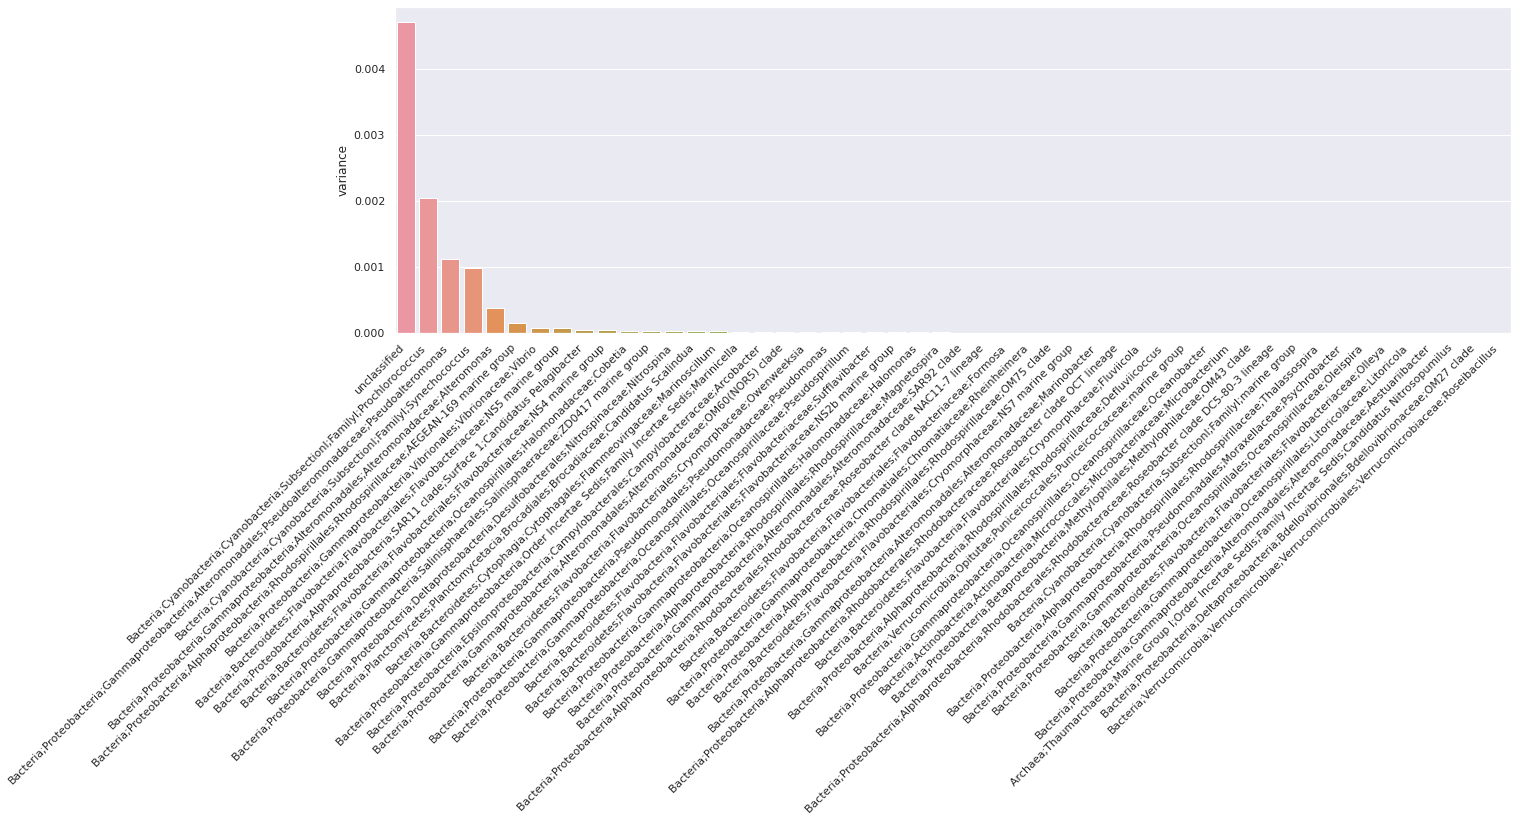

In [11]:
# visualization as barplot
plt.figure(figsize=(20, 6))
varplot = sns.barplot(x=var_sort.iloc[range(50)].index, y="variance", data=var_sort.iloc[range(50)])
plt.legend([],[], frameon=False) # hide legend
varplot.set_xticklabels(varplot.get_xticklabels(), rotation=45, horizontalalignment='right') # rotate x axis labels
# show
plt.show()

In [12]:
var_sort.iloc[range(50)].index

Index(['unclassified',
       'Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Prochlorococcus',
       'Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Pseudoalteromonadaceae;Pseudoalteromonas',
       'Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Synechococcus',
       'Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Alteromonadaceae;Alteromonas',
       'Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Rhodospirillaceae;AEGEAN-169 marine group',
       'Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio',
       'Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;NS5 marine group',
       'Bacteria;Proteobacteria;Alphaproteobacteria;SAR11 clade;Surface 1;Candidatus Pelagibacter',
       'Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;NS4 marine group',
       'Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Cobetia',
       'Bac

In [14]:
# explore species with highest variance
# 'Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Prochlorococcus'
prok_norm['Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Prochlorococcus'].values

array([0.04913773, 0.08519161, 0.05542104, 0.02260438, 0.02772483,
       0.03368975, 0.11056   , 0.09556056, 0.03549092, 0.01813053,
       0.11202361, 0.02942104, 0.05735716, 0.01558157, 0.19844424,
       0.07749246, 0.16535606, 0.0557904 , 0.02884314, 0.03801368,
       0.01254879, 0.01241024, 0.06706181, 0.06575342, 0.09977225,
       0.05570695, 0.13707887, 0.07505733, 0.10911937, 0.18841336,
       0.15699423, 0.11137135, 0.19990422, 0.1498793 , 0.09274273,
       0.11071957, 0.09841201, 0.09711969, 0.12296547, 0.02258868,
       0.02295445, 0.01141842, 0.00931977, 0.00440995, 0.09576211,
       0.08221088, 0.08109033, 0.05143361, 0.11607972, 0.07230331,
       0.1028302 , 0.06119965, 0.11703998, 0.00351248, 0.01597236,
       0.04814308, 0.05418208, 0.13220186, 0.07659863, 0.11726313,
       0.06856561, 0.07186421, 0.05189788, 0.04866262, 0.07695593,
       0.06716968, 0.04537718, 0.05596312, 0.08246549, 0.06990214,
       0.13010394, 0.13328607, 0.05130284, 0.09102181, 0.01482

In [15]:
# get names of species with highest variance in abundance between locations
subset = var_sort.iloc[range(30)].index

# subset euk to species with highest variance between locations
prok_var_z = prok_scaled[subset]

# reset index
prok_var_z = prok_var_z.reset_index()

# show
prok_var_z

,Sample,unclassified,Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Prochlorococcus,Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Pseudoalteromonadaceae;Pseudoalteromonas,Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Synechococcus,Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Alteromonadaceae;Alteromonas,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Rhodospirillaceae;AEGEAN-169 marine group,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;NS5 marine group,Bacteria;Proteobacteria;Alphaproteobacteria;SAR11 clade;Surface 1;Candidatus Pelagibacter,...,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Oceanospirillaceae;Pseudospirillum,Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;Sufflavibacter,Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;NS2b marine group,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Rhodospirillaceae;Magnetospira,Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Alteromonadaceae;SAR92 clade,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Roseobacter clade NAC11-7 lineage,Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;Formosa,Bacteria;Proteobacteria;Gammaproteobacteria;Chromatiales;Chromatiaceae;Rheinheimera,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Rhodospirillaceae;OM75 clade
0,S4DCM,0.191620,-0.421368,-0.126023,-0.474230,-0.299185,0.433556,-0.174851,1.144679,0.418682,...,-0.526363,1.121655,0.381784,-0.335408,0.044690,0.518150,-0.077926,-0.191591,-0.116811,-0.500236
1,S4SUR,-0.587134,0.381570,-0.108143,-0.336688,-0.076031,1.501376,-0.171443,0.212354,0.694897,...,-0.582921,-0.375867,0.435829,0.104827,-0.264339,2.395152,-0.043781,0.595766,-0.105502,0.653895
2,S7DCM,-1.690872,-0.281436,-0.162477,-0.273358,6.067389,-1.200775,-0.054701,1.489465,1.432992,...,0.228528,-1.039377,-0.957309,-0.387099,-0.835995,0.162899,1.182710,-0.093177,-0.117462,0.882685
3,S7SUR,-0.389119,-1.012279,-0.102242,-0.525169,0.868732,1.880908,-0.012737,2.075467,2.452121,...,-0.558361,-1.209736,1.810298,-0.152072,-0.893883,-0.122005,-0.091857,-0.201544,-0.117277,0.096989
4,S9DCM,0.768585,-0.898244,-0.156497,-0.836760,-0.227072,-0.639444,-0.156279,1.012054,0.988579,...,0.557264,-0.188322,0.584914,-0.399150,0.810993,-0.039738,-0.025448,-0.319584,-0.125147,0.169430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,S150SUR,0.425793,0.112212,-0.174143,-0.247186,-0.422131,-0.405678,-0.165391,0.121175,0.730409,...,-0.393036,1.177354,0.050332,-0.425563,-0.136469,-0.354673,-0.123786,0.650726,-0.125147,0.095674
100,S151DCM,1.285038,-1.081696,-0.184815,-0.859890,-0.483004,-0.229761,-0.153484,0.285130,0.238041,...,0.408293,-0.268301,-0.388435,-0.349237,0.725729,-0.146434,-0.064155,0.111482,-0.113690,0.521159
101,S151SUR,0.663973,-0.428887,-0.121549,-0.633295,-0.496430,-0.932814,-0.156062,0.597957,1.098703,...,-0.844748,1.264709,1.658110,-0.172469,-0.481819,0.323452,-0.114980,1.542264,-0.120293,-0.532016
102,S152DCM,0.112896,-0.666309,-0.158264,-0.146920,-0.534302,0.339044,-0.164377,1.516065,0.546806,...,0.096928,1.738396,0.800530,-0.426872,0.516800,-0.382037,0.113957,1.793774,-0.125147,0.818687


In [16]:
# read environmental data
url = 'https://github.com/jonas-richter/tara_guidi2016_data/blob/data_exploration/data/SI4_environmental_data.tsv?raw=true'
df = pd.read_csv(url, on_bad_lines='skip', sep='\t', header = 0)
# show
df

,Sample,Latitude,Longitude,Salinity,NO2 (umol/L),PO4 (umol/L),NO2NO3 (umol/L),Mean Chloro HPLC adjusted (mg Chl/m3),Mean Temperature deg C,Mean Oxygen adjusted (umol/Kg),Mean Flux at 150m,NPP 8d VGPM (mgC/m2/day)
0,S4DCM,36.573000,-6.538667,36.556443,NaN,NaN,NaN,0.880307,16.246331,NaN,NaN,NaN
1,S4SUR,36.553333,-6.566833,36.632400,NaN,NaN,NaN,0.078000,20.525100,NaN,NaN,686.0860
2,S7DCM,37.038683,1.949833,NaN,0.00,0.01,0.03,0.553274,17.367460,NaN,NaN,354.2245
3,S7SUR,37.021067,1.949467,37.491100,0.00,0.06,0.03,0.081200,23.825750,NaN,NaN,354.2245
4,S9DCM,39.073400,5.859833,37.823200,0.02,0.02,0.08,0.434367,16.151933,NaN,NaN,205.1220
...,...,...,...,...,...,...,...,...,...,...,...,...
99,S150SUR,35.907050,-37.260950,36.312300,0.04,0.01,0.17,0.196921,17.583075,228.375583,0.412354,573.6970
100,S151DCM,36.194437,-28.882892,36.162887,0.01,0.01,0.05,0.247378,16.751066,228.545150,1.379385,466.3220
101,S151SUR,36.155767,-29.008900,36.237750,0.02,0.01,0.02,0.040347,17.260108,232.053333,4.591674,444.0935
102,S152DCM,43.739633,-16.882796,35.989700,0.32,0.17,2.26,0.268290,14.282106,240.842650,4.113166,442.7360


In [17]:
# center and scale data (account for some species being overall higher or lower abundant)
sc = StandardScaler()

# make Eukaryotic lineages as row name
df_scaled = df.set_index(df['Sample'])

# rm Sample col
df_scaled_format = df_scaled.drop(['Latitude', 'Longitude','Sample'], axis = 1)

# apply scaler
df_scaled = sc.fit_transform(df_scaled_format.to_numpy())

# convert to pandas data frame
df_scaled = pd.DataFrame(df_scaled, columns=[df_scaled_format.columns])

# show first n rows
df_scaled.head()

,Salinity,NO2 (umol/L),PO4 (umol/L),NO2NO3 (umol/L),Mean Chloro HPLC adjusted (mg Chl/m3),Mean Temperature deg C,Mean Oxygen adjusted (umol/Kg),Mean Flux at 150m,NPP 8d VGPM (mgC/m2/day)
0,0.364113,NaN,NaN,NaN,2.759744,-1.391447,NaN,NaN,NaN
1,0.410703,NaN,NaN,NaN,-0.717905,-0.413132,NaN,NaN,0.300657
2,NaN,-0.562335,-0.797969,-0.483448,1.342199,-1.135107,NaN,NaN,-0.201176
3,0.937404,-0.562335,-0.660659,-0.483448,-0.704034,0.341542,NaN,NaN,-0.201176
4,1.141104,-0.475984,-0.770507,-0.472310,0.826790,-1.413030,NaN,NaN,-0.426645


In [18]:
# re-add 'Latitude', 'Longitude','Sample'
df_scaled[['Latitude', 'Longitude','Sample']] = df[['Latitude', 'Longitude','Sample']]

df_scaled

,Salinity,NO2 (umol/L),PO4 (umol/L),NO2NO3 (umol/L),Mean Chloro HPLC adjusted (mg Chl/m3),Mean Temperature deg C,Mean Oxygen adjusted (umol/Kg),Mean Flux at 150m,NPP 8d VGPM (mgC/m2/day),Latitude,Longitude,Sample
0,0.364113,NaN,NaN,NaN,2.759744,-1.391447,NaN,NaN,NaN,36.573000,-6.538667,S4DCM
1,0.410703,NaN,NaN,NaN,-0.717905,-0.413132,NaN,NaN,0.300657,36.553333,-6.566833,S4SUR
2,NaN,-0.562335,-0.797969,-0.483448,1.342199,-1.135107,NaN,NaN,-0.201176,37.038683,1.949833,S7DCM
3,0.937404,-0.562335,-0.660659,-0.483448,-0.704034,0.341542,NaN,NaN,-0.201176,37.021067,1.949467,S7SUR
4,1.141104,-0.475984,-0.770507,-0.472310,0.826790,-1.413030,NaN,NaN,-0.426645,39.073400,5.859833,S9DCM
...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.214363,-0.389634,-0.797969,-0.452261,-0.202434,-1.085808,0.958752,-0.593838,0.130705,35.907050,-37.260950,S150SUR
100,0.122717,-0.519159,-0.797969,-0.478993,0.016275,-1.276042,0.964504,-0.270262,-0.031665,36.194437,-28.882892,S151DCM
101,0.168636,-0.475984,-0.797969,-0.485676,-0.881114,-1.159653,1.083508,0.804594,-0.065278,36.155767,-29.008900,S151SUR
102,0.016490,0.819271,-0.358576,0.013313,0.106919,-1.840555,1.381657,0.644481,-0.067331,43.739633,-16.882796,S152DCM


In [19]:
prok_var_z

,Sample,unclassified,Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Prochlorococcus,Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Pseudoalteromonadaceae;Pseudoalteromonas,Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Synechococcus,Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Alteromonadaceae;Alteromonas,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Rhodospirillaceae;AEGEAN-169 marine group,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;NS5 marine group,Bacteria;Proteobacteria;Alphaproteobacteria;SAR11 clade;Surface 1;Candidatus Pelagibacter,...,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Oceanospirillaceae;Pseudospirillum,Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;Sufflavibacter,Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;NS2b marine group,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Rhodospirillaceae;Magnetospira,Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Alteromonadaceae;SAR92 clade,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Roseobacter clade NAC11-7 lineage,Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;Formosa,Bacteria;Proteobacteria;Gammaproteobacteria;Chromatiales;Chromatiaceae;Rheinheimera,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Rhodospirillaceae;OM75 clade
0,S4DCM,0.191620,-0.421368,-0.126023,-0.474230,-0.299185,0.433556,-0.174851,1.144679,0.418682,...,-0.526363,1.121655,0.381784,-0.335408,0.044690,0.518150,-0.077926,-0.191591,-0.116811,-0.500236
1,S4SUR,-0.587134,0.381570,-0.108143,-0.336688,-0.076031,1.501376,-0.171443,0.212354,0.694897,...,-0.582921,-0.375867,0.435829,0.104827,-0.264339,2.395152,-0.043781,0.595766,-0.105502,0.653895
2,S7DCM,-1.690872,-0.281436,-0.162477,-0.273358,6.067389,-1.200775,-0.054701,1.489465,1.432992,...,0.228528,-1.039377,-0.957309,-0.387099,-0.835995,0.162899,1.182710,-0.093177,-0.117462,0.882685
3,S7SUR,-0.389119,-1.012279,-0.102242,-0.525169,0.868732,1.880908,-0.012737,2.075467,2.452121,...,-0.558361,-1.209736,1.810298,-0.152072,-0.893883,-0.122005,-0.091857,-0.201544,-0.117277,0.096989
4,S9DCM,0.768585,-0.898244,-0.156497,-0.836760,-0.227072,-0.639444,-0.156279,1.012054,0.988579,...,0.557264,-0.188322,0.584914,-0.399150,0.810993,-0.039738,-0.025448,-0.319584,-0.125147,0.169430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,S150SUR,0.425793,0.112212,-0.174143,-0.247186,-0.422131,-0.405678,-0.165391,0.121175,0.730409,...,-0.393036,1.177354,0.050332,-0.425563,-0.136469,-0.354673,-0.123786,0.650726,-0.125147,0.095674
100,S151DCM,1.285038,-1.081696,-0.184815,-0.859890,-0.483004,-0.229761,-0.153484,0.285130,0.238041,...,0.408293,-0.268301,-0.388435,-0.349237,0.725729,-0.146434,-0.064155,0.111482,-0.113690,0.521159
101,S151SUR,0.663973,-0.428887,-0.121549,-0.633295,-0.496430,-0.932814,-0.156062,0.597957,1.098703,...,-0.844748,1.264709,1.658110,-0.172469,-0.481819,0.323452,-0.114980,1.542264,-0.120293,-0.532016
102,S152DCM,0.112896,-0.666309,-0.158264,-0.146920,-0.534302,0.339044,-0.164377,1.516065,0.546806,...,0.096928,1.738396,0.800530,-0.426872,0.516800,-0.382037,0.113957,1.793774,-0.125147,0.818687


In [20]:
# Join environmental data to prokaryotes with high variance in abundance between locations
df_c = prok_var_z.join(df_scaled, how='left', lsuffix='_left', rsuffix='_right')

df_c

,Sample_left,unclassified,Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Prochlorococcus,Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Pseudoalteromonadaceae;Pseudoalteromonas,Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Synechococcus,Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Alteromonadaceae;Alteromonas,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Rhodospirillaceae;AEGEAN-169 marine group,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;NS5 marine group,Bacteria;Proteobacteria;Alphaproteobacteria;SAR11 clade;Surface 1;Candidatus Pelagibacter,...,PO4 (umol/L),NO2NO3 (umol/L),Mean Chloro HPLC adjusted (mg Chl/m3),Mean Temperature deg C,Mean Oxygen adjusted (umol/Kg),Mean Flux at 150m,NPP 8d VGPM (mgC/m2/day),Latitude,Longitude,Sample_right
0,S4DCM,0.191620,-0.421368,-0.126023,-0.474230,-0.299185,0.433556,-0.174851,1.144679,0.418682,...,NaN,NaN,2.759744,-1.391447,NaN,NaN,NaN,36.573000,-6.538667,S4DCM
1,S4SUR,-0.587134,0.381570,-0.108143,-0.336688,-0.076031,1.501376,-0.171443,0.212354,0.694897,...,NaN,NaN,-0.717905,-0.413132,NaN,NaN,0.300657,36.553333,-6.566833,S4SUR
2,S7DCM,-1.690872,-0.281436,-0.162477,-0.273358,6.067389,-1.200775,-0.054701,1.489465,1.432992,...,-0.797969,-0.483448,1.342199,-1.135107,NaN,NaN,-0.201176,37.038683,1.949833,S7DCM
3,S7SUR,-0.389119,-1.012279,-0.102242,-0.525169,0.868732,1.880908,-0.012737,2.075467,2.452121,...,-0.660659,-0.483448,-0.704034,0.341542,NaN,NaN,-0.201176,37.021067,1.949467,S7SUR
4,S9DCM,0.768585,-0.898244,-0.156497,-0.836760,-0.227072,-0.639444,-0.156279,1.012054,0.988579,...,-0.770507,-0.472310,0.826790,-1.413030,NaN,NaN,-0.426645,39.073400,5.859833,S9DCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,S150SUR,0.425793,0.112212,-0.174143,-0.247186,-0.422131,-0.405678,-0.165391,0.121175,0.730409,...,-0.797969,-0.452261,-0.202434,-1.085808,0.958752,-0.593838,0.130705,35.907050,-37.260950,S150SUR
100,S151DCM,1.285038,-1.081696,-0.184815,-0.859890,-0.483004,-0.229761,-0.153484,0.285130,0.238041,...,-0.797969,-0.478993,0.016275,-1.276042,0.964504,-0.270262,-0.031665,36.194437,-28.882892,S151DCM
101,S151SUR,0.663973,-0.428887,-0.121549,-0.633295,-0.496430,-0.932814,-0.156062,0.597957,1.098703,...,-0.797969,-0.485676,-0.881114,-1.159653,1.083508,0.804594,-0.065278,36.155767,-29.008900,S151SUR
102,S152DCM,0.112896,-0.666309,-0.158264,-0.146920,-0.534302,0.339044,-0.164377,1.516065,0.546806,...,-0.358576,0.013313,0.106919,-1.840555,1.381657,0.644481,-0.067331,43.739633,-16.882796,S152DCM


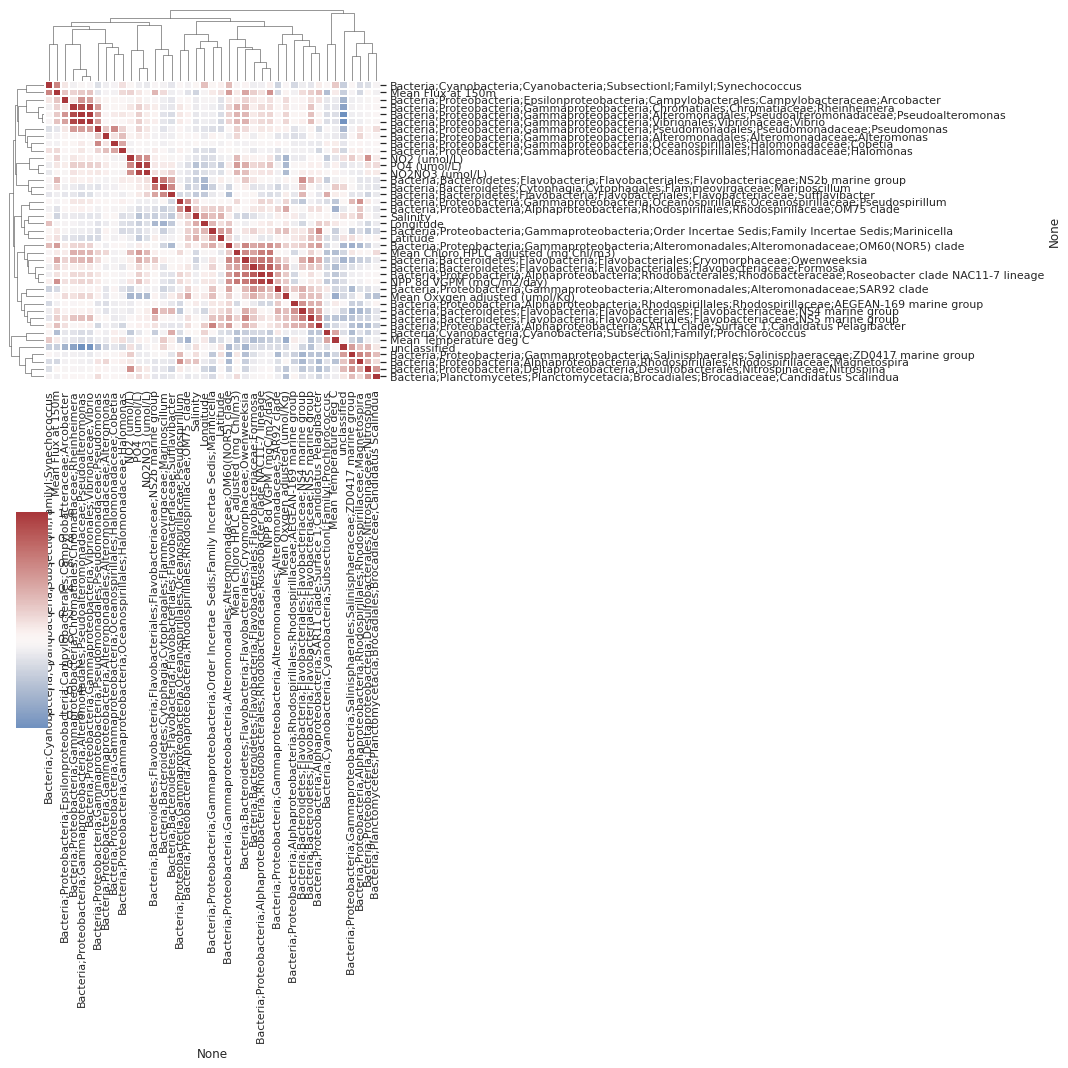

In [21]:
sns.clustermap(df_c.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(15, 15))

In [22]:
# geographic plot
subset = df_c[['Longitude', 'Latitude', 'Bacteria;Cyanobacteria;Cyanobacteria;SubsectionI;FamilyI;Synechococcus']].values
px.scatter_geo(data_frame = subset, lat= 1, lon = 0, color = 2)

In [23]:
subset = df_c[['Longitude', 'Latitude', 'Mean Flux at 150m']].values
px.scatter_geo(data_frame = subset, lat= 1, lon = 0, color = 2)